In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# A

In [1]:
import collections
import io
import math
import os
import random
from six.moves import urllib

from IPython.display import clear_output, Image, display, HTML

import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
import scipy.io
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import time

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!tar -xzf 102flowers.tgz
!rm 102flowers.tgz
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2022-11-17 13:00:28--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz [following]
--2022-11-17 13:00:29--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  31.7MB/s    in 11s     

2022-11-17 13:00:40 (29.4 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2022-11-17 13:00:44--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.

In [2]:
import tarfile
import urllib
# this snippet of code is modified for our use case with additional comments, original source code:
# https://github.com/tflearn/tflearn/blob/master/tflearn/datasets/cifar10.py
def download(filename, source_url, work_directory):
    if not os.path.exists(work_directory): #check if the folder exists; if not make dir
        os.mkdir(work_directory)
    filepath = os.path.join(work_directory, filename)
    if not os.path.exists(filepath): # check if file exists; if not, download
        print("Downloading file, Please wait...")
        filepath, _ = urllib.request.urlretrieve(source_url + filename, # this is a function to download files
                                                 filepath)
        statinfo = os.stat(filepath)
        print(('Succesfully downloaded', filename, statinfo.st_size, 'bytes.'))
        untar(filepath,work_directory)
    return filepath

In [3]:
#only extract jpg files
def jpg_files(members):
    for tarinfo in members:
        if os.path.splitext(tarinfo.name)[1] == ".jpg":
            yield tarinfo

In [4]:
# extract function
def untar(fname,path="17category-flowers-py"): #untarring the archive
    tar = tarfile.open(fname)
    tar.extractall(path="17category-flowers-py", members=jpg_files(tar))
    tar.close()
    if path is "":
        print("File Extracted in Current Directory")
    else:
        print("File Extracted in to ",  path)

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-4-21f35051e59f>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if path is "":


In [5]:
download("17flowers.tgz", "http://www.robots.ox.ac.uk/~vgg/data/flowers/17/","17category-flowers-py")

('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted in to  17category-flowers-py


'17category-flowers-py/17flowers.tgz'

In [6]:
os.listdir("/content/17category-flowers-py/")

['jpg', '17flowers.tgz']

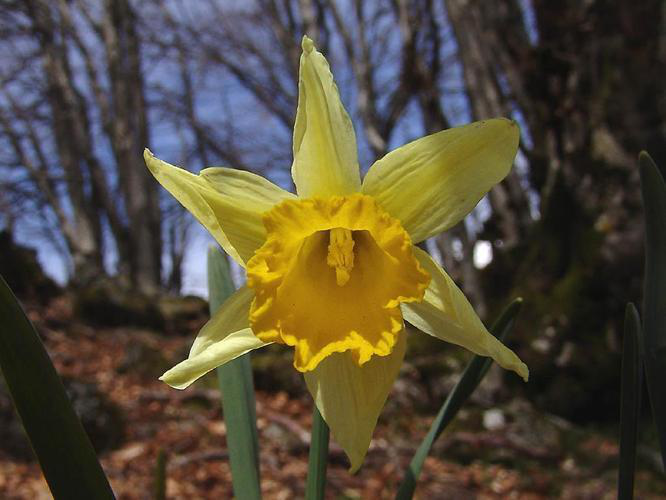

In [7]:
from PIL import Image #show one example of image
Image.open("/content/17category-flowers-py/jpg/image_0002.jpg")

In [8]:
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

In [9]:
#all images are loaded as np arrays
images=[]
labels=[]
total=1361
j=1
for i in range(1, total): 
    fname="/content/17category-flowers-py/jpg/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    images.append(load_data(fpath))
    labels.append(j) #labels are created as well
    if i%80==0: j+=1

In [ ]:
from sklearn.model_selection import train_test_split 
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.8, random_state =  104)

In [10]:
images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
labels = np.asarray(labels).reshape(1360,1) # labels are also converted to (1360,1)
images.shape

(1360, 224, 224, 3)

In [ ]:
images=images/255.0

In [11]:
labels=labels.ravel()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


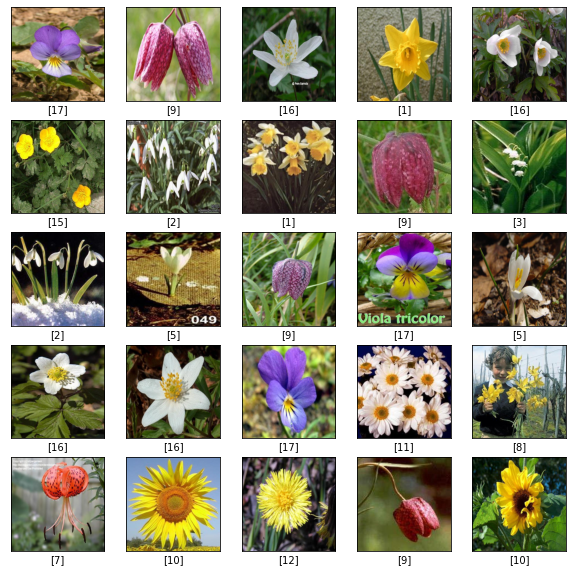

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255, cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

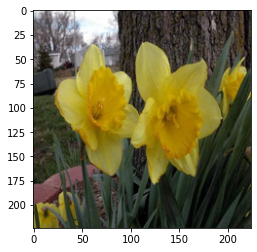

In [ ]:
plt.imshow(images[0]/255)
plt.show()

In [ ]:
train_labels[0]

array([17])

In [ ]:
images[0]

array([[[242., 241., 246.],
        [235., 234., 239.],
        [235., 234., 239.],
        ...,
        [ 39.,  30.,  31.],
        [ 60.,  51.,  52.],
        [ 52.,  43.,  44.]],

       [[234., 233., 238.],
        [226., 225., 230.],
        [224., 223., 228.],
        ...,
        [ 33.,  26.,  26.],
        [ 65.,  58.,  59.],
        [ 66.,  59.,  59.]],

       [[224., 224., 229.],
        [214., 214., 219.],
        [209., 209., 214.],
        ...,
        [ 26.,  21.,  20.],
        [ 56.,  50.,  50.],
        [ 65.,  60.,  60.]],

       ...,

       [[138., 132.,  59.],
        [137., 133.,  40.],
        [134., 132.,  48.],
        ...,
        [ 41.,  51.,  35.],
        [ 41.,  45.,  34.],
        [ 50.,  49.,  42.]],

       [[132., 125.,  56.],
        [134., 126.,  41.],
        [139., 133.,  48.],
        ...,
        [ 39.,  51.,  33.],
        [ 40.,  44.,  30.],
        [ 48.,  47.,  37.]],

       [[132., 123.,  55.],
        [132., 123.,  40.],
        [136., 1

In [ ]:
img_labels = scipy.io.loadmat("imagelabels.mat")
img_labels = img_labels["labels"]
img_labels = img_labels[0]
for i in range(len(img_labels)):
  img_labels[i] = img_labels[i] - 1

In [ ]:
len(img_labels)

8189

In [ ]:
values, counts = np.unique(img_labels, return_counts=True)

In [ ]:
values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101], dtype=uint8)

In [ ]:
counts

array([ 40,  60,  40,  56,  65,  45,  40,  85,  46,  45,  87,  87,  49,
        48,  49,  41,  85,  82,  49,  56,  40,  59,  91,  42,  41,  41,
        40,  66,  78,  85,  52,  45,  46,  40,  43,  75, 108,  56,  41,
        67, 127,  59, 130,  93,  40, 196,  67,  71,  49,  92, 258,  85,
        93,  61,  71, 109,  67, 114,  67, 109,  50,  55,  54,  52, 102,
        61,  42,  54,  54,  62,  78,  96, 194, 171, 120, 107, 251, 137,
        41, 105, 166, 112, 131,  86,  63,  58,  63, 154, 184,  82,  76,
        66,  46, 162, 128,  91,  66,  82,  63,  49,  58,  48])

In [ ]:
result = np.nonzero(values == 25)

In [ ]:
result[0][0]

25

In [ ]:
counts[25]

41

In [ ]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
y_train = y_train.ravel()

In [ ]:
y_val = y_val.ravel()

In [ ]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
import cv2
trainx = []
trainy = []
dir = "jpg/"
for imgs in os.listdir(dir):
  img_num = int(imgs[7:11])-1
  trainy.append(img_labels[img_num])
  image = cv2.imread(os.path.join(dir, imgs))
  resized = cv2.resize(image, (24,24))
  # normalized_img = cv2.normalize(resized, None, alpha=0, beta=1, 
  #                           norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  trainx.append(resized)

In [12]:
from skimage import feature
import cv2
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
X_train, valx, y_train, valy = train_test_split(trainx, trainy,stratify=trainy, test_size=0.4, random_state=10)
X_text,X_val,y_text,y_val = train_test_split(valx, valy,stratify=valy, test_size=0.4, random_state=10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(trainx, trainy,stratify=trainy, test_size=0.4, random_state=10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train,stratify=y_train, test_size=0.6, random_state=10)

In [ ]:
len(X_train)

14000

In [ ]:
len(y_train)

14000

# Start

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size = 0.8, random_state =  16)

In [13]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  45)

In [ ]:
import random
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  random.randrange(0,400,300) )
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.97, random_state =  random.randrange(0,400,20))
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)

In [ ]:
from sklearn.model_selection import train_test_split
import random
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state = random.randrange(0,400,300) )
X_trainz, X_val, y_trainz, y_val = train_test_split(images, labels, train_size = random.randrange(96,98,3)/100, random_state =  random.randrange(0,400,20))
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)

In [14]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)

In [15]:
color_hist_val_des=[]
for image in X_val:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_val_des.append(total_hist)

In [16]:
X_train_des=[]
X_val_des=[]
for image in X_train:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des.append(hog_desc)
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)

In [ ]:
X_des=[]
for image in images:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_des.append(hog_desc)

In [17]:
X_train_desc=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des[index]), axis=None)
  X_train_desc.append(nn)
X_val_desc=[]
for index in range(len(color_hist_val_des)):
  nn=np.concatenate((color_hist_val_des[index], X_val_des[index]), axis=None)
  X_val_desc.append(nn)

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1,0.5,1,2,3,10,100], 
              'gamma': [10,3,2,1,0.2, 0.1,0.01],
              'kernel': ['linear', 'poly','rbf','sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_des, labels)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV 1/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.419 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.438 total time=   0.4s
[CV 3/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.342 total time=   0.4s
[CV 4/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.290 total time=   0.4s
[CV 5/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.228 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.515 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.515 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.493 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.415 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.287 total time=   0.4s
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.210 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rb

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 10, 100],
                         'gamma': [10, 3, 2, 1, 0.2, 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.01,0.1,0.5,0.6,1,1.5,2,3,10,100], 
              'gamma': [4,3,2.5,2,1,0.2,0.1,0.01,0.001],
              'kernel': ['linear', 'poly','rbf','sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_des, labels)

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.01,0.1,0.5,0.6,1,1.5,2,3,10,100], 
              'gamma': [5,4,3,2.5,2,1.5,1,0.2,0.1,0.01,0.001],
              'kernel': ['linear','sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_des, labels)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
[CV 1/5] END ....C=0.01, gamma=5, kernel=linear;, score=0.419 total time=   0.7s
[CV 2/5] END ....C=0.01, gamma=5, kernel=linear;, score=0.438 total time=   0.8s
[CV 3/5] END ....C=0.01, gamma=5, kernel=linear;, score=0.342 total time=   0.8s
[CV 4/5] END ....C=0.01, gamma=5, kernel=linear;, score=0.290 total time=   0.8s
[CV 5/5] END ....C=0.01, gamma=5, kernel=linear;, score=0.228 total time=   0.5s
[CV 1/5] END ...C=0.01, gamma=5, kernel=sigmoid;, score=0.140 total time=   0.7s
[CV 2/5] END ...C=0.01, gamma=5, kernel=sigmoid;, score=0.147 total time=   0.6s
[CV 3/5] END ...C=0.01, gamma=5, kernel=sigmoid;, score=0.114 total time=   0.5s
[CV 4/5] END ...C=0.01, gamma=5, kernel=sigmoid;, score=0.140 total time=   0.5s
[CV 5/5] END ...C=0.01, gamma=5, kernel=sigmoid;, score=0.081 total time=   0.5s
[CV 1/5] END ....C=0.01, gamma=4, kernel=linear;, score=0.419 total time=   0.3s
[CV 2/5] END ....C=0.01, gamma=4, kernel=line

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 0.6, 1, 1.5, 2, 3, 10, 100],
                         'gamma': [5, 4, 3, 2.5, 2, 1.5, 1, 0.2, 0.1, 0.01,
                                   0.001],
                         'kernel': ['linear', 'sigmoid']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'poly'}
SVC(C=1, gamma=1, kernel='poly')


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 2, 'gamma': 2, 'kernel': 'rbf'}
SVC(C=2, gamma=2)


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1.5, 'gamma': 2, 'kernel': 'rbf'}
SVC(C=1.5, gamma=2)


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 3, 'gamma': 5, 'kernel': 'linear'}
SVC(C=3, gamma=5, kernel='linear')


In [ ]:
labels

array([ 1,  1,  1, ..., 17, 17, 17])

In [ ]:
X_vv=np.array(X_train_des)
X_vv.shape

(1088, 512)

In [ ]:
len(y_train)

1088

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_des, y_train)

GaussianNB()

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc, y_train)

SVC(C=1.5, gamma=2)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=1.5,gamma=2)
clf.fit(X_train_des, y_train)

SVC(C=1.5, gamma=2, kernel='poly')

In [ ]:
clf.score(X_train_desc,y_train)

0.9779411764705882

In [ ]:
clf.score(X_val_desc, y_val)

0.5871559633027523

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=3,gamma=5)
clf.fit(X_train_des, y_train)

SVC(C=3, gamma=5, kernel='linear')

In [ ]:
clf.score(X_train_des,y_train)

0.8065610859728507

In [ ]:
clf.score(X_val_des, y_val)

0.43907563025210083

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_des, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
clf.score(X_train_des,y_train)

0.8065610859728507

In [ ]:
clf.score(X_val_des, y_val)

0.43907563025210083

In [ ]:
X_train_des=[]
X_val_des=[]
for image in x_train:
  hog_desc = feature.hog(image, orientations=9, pixels_per_cell=(6, 6), cells_per_block=(4, 4), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des.append(hog_desc)
for image in x_test:
  hog_desc = feature.hog(image, orientations=9, pixels_per_cell=(6, 6), cells_per_block=(4, 4), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)

In [ ]:
len(X_train_des[0])

6084

In [ ]:
y_train=y_train.ravel()

In [ ]:
y_train[0]

5

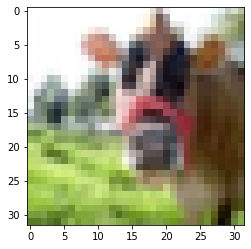

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [ ]:
y_train[0]

array([5], dtype=uint8)

In [ ]:
nn=np.array(X_train_des)

In [ ]:
nn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
nn.shape

(60000, 6084)

In [ ]:
from sklearn import datasets, svm, metrics
classifier = svm.SVC(gamma=0.01, kernel='rbf')
#fit to the trainin data
classifier.fit(X_train_des,y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train_des, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
neigh.score(X_train_des, y_train)

0.5457857142857143

In [ ]:
neigh.score(X_val_des, y_val)

0.4495

In [ ]:
y_train

In [ ]:
classifier.score(X_train_des, y_train)

0.6688571428571428

In [ ]:
classifier.score(X_val_des, y_val)

0.5443333333333333

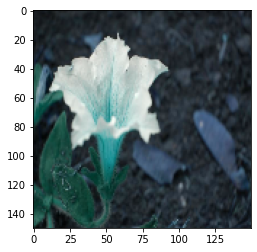

50


In [ ]:
plt.imshow(trainx[1],cmap='gray')
plt.show()
print(trainy[1])

In [ ]:
trainx[0]

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        ...,
        [0.43137258, 0.45882356, 0.47058827],
        [0.43921572, 0.45098042, 0.47058827],
        [0.43921572, 0.45098042, 0.47058827]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.42352945, 0.44705886, 0.4666667 ],
        [0.43529415, 0.44705886, 0.46274513],
        [0.427451  , 0.43921572, 0.454902  ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.40784317, 0.43137258, 0.45882356],
        [0.43137258, 0.44705886, 0.45098042],
        [0.42352945, 0.43921572, 0.4431373 ]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

In [ ]:
print('Training Dataset Shape: ­{}'.format(trainx.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))

Training Dataset Shape: ­(5732, 150, 150, 3)
No. of Training Dataset Labels: 5732


In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import skimage

In [ ]:
import skimage
rotated_image=skimage.util.random_noise(X_train[index], mode='speckle', seed=None, clip=True, var=0.1)

In [20]:
import imageio
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd

In [ ]:
datadir_train='/content/gdrive/My Drive/dataset/80x80_89class/Train'
datadir_test='/content/gdrive/My Drive/dataset/80x80_89class/Test'
datadir_validation='/content/gdrive/My Drive/dataset/80x80_89class/Validation'
train_set=[]
test_set=[]
val_set=[]

In [ ]:
categories=[]
for label in os.listdir(datadir_train):
  categories.append(label)

In [ ]:
from PIL import Image

def white_bg_square(img):
    "return a white-background-color image having the img in exact center"
    size = (max(img.size),)*2
    layer = Image.new('L', size, 255)
    layer.paste(img, tuple(map(lambda x:int((x[0]-x[1])/2), zip(size, img.size))))
    return layer

In [ ]:
def reverse_white(img):
  width , height = img.shape
  new_img= img.copy()
  for x in range(0,width):
          for y in range(0,height):
              if new_img[x,y] >= 230:            
                  new_img[x,y] = 230
  return new_img

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

In [ ]:
import imageio
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd

In [ ]:
datadir_train='/content/gdrive/My Drive/dataset/80x80_89class/Train'
datadir_test='/content/gdrive/My Drive/dataset/80x80_89class/Test'
datadir_validation='/content/gdrive/My Drive/dataset/80x80_89class/Validation'
train_set=[]
test_set=[]
val_set=[]

In [ ]:
categories=[]
for label in os.listdir(datadir_train):
  categories.append(label)

In [ ]:
from PIL import Image

def white_bg_square(img):
    "return a white-background-color image having the img in exact center"
    size = (max(img.size),)*2
    layer = Image.new('L', size, 255)
    layer.paste(img, tuple(map(lambda x:int((x[0]-x[1])/2), zip(size, img.size))))
    return layer

In [ ]:
def reverse_white(img):
  width , height = img.shape
  new_img= img.copy()
  for x in range(0,width):
          for y in range(0,height):
              if new_img[x,y] >= 230:            
                  new_img[x,y] = 230
  return new_img

In [ ]:
pip install git+https://github.com/aleju/imgaug.git

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

In [ ]:
import imageio
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd

In [ ]:
datadir_train='/content/gdrive/My Drive/dataset/80x80_89class/Train'
datadir_test='/content/gdrive/My Drive/dataset/80x80_89class/Test'
datadir_validation='/content/gdrive/My Drive/dataset/80x80_89class/Validation'
train_set=[]
test_set=[]
val_set=[]

In [ ]:
categories=[]
for label in os.listdir(datadir_train):
  categories.append(label)

In [ ]:
from PIL import Image

def white_bg_square(img):
    "return a white-background-color image having the img in exact center"
    size = (max(img.size),)*2
    layer = Image.new('L', size, 255)
    layer.paste(img, tuple(map(lambda x:int((x[0]-x[1])/2), zip(size, img.size))))
    return layer

In [ ]:
def reverse_white(img):
  width , height = img.shape
  new_img= img.copy()
  for x in range(0,width):
          for y in range(0,height):
              if new_img[x,y] >= 230:            
                  new_img[x,y] = 230
  return new_img

# Tạo các Set

## Train Set

In [ ]:
for category in categories:
  path=os.path.join(datadir_train,category)
  class_num=categories.index(category)
  for img in os.listdir(path):
    IMG_SIZE=28
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    try:
      # img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      # reversed_white_img = reverse_white(img_array)
      img_pil = Image.fromarray(img_array)
      new_array= white_bg_square(img_pil)
      img_resize_lanczos = new_array.resize((28, 28), Image.LANCZOS)
      im_np = np.asarray(img_resize_lanczos)
      # resized_img=cv2.resize(im_np,(IMG_SIZE,IMG_SIZE))
      reversed_img=cv2.bitwise_not(im_np)
      train_set.append([reversed_img,class_num])
    except:
      pass

In [ ]:
print(len(train_set))

168


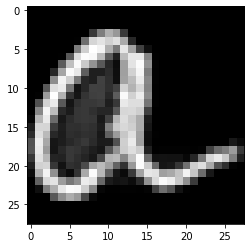

a


In [ ]:
plt.imshow(train_set[15040][0],cmap='gray')
plt.show()
print(categories[train_set[15040][1]])

## Test Set

In [ ]:
for category in categories:
  path=os.path.join(datadir_test,category)
  class_num=categories.index(category)
  for img in os.listdir(path):
    IMG_SIZE=28
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    try:
      # img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      # reversed_white_img = reverse_white(img_array)
      img_pil = Image.fromarray(img_array)
      new_array= white_bg_square(img_pil)
      img_resize_lanczos = new_array.resize((28, 28), Image.LANCZOS)
      im_np = np.asarray(img_resize_lanczos)
      # resized_img=cv2.resize(im_np,(IMG_SIZE,IMG_SIZE))
      reversed_img=cv2.bitwise_not(im_np)
      test_set.append([reversed_img,class_num])
    except:
      pass

In [ ]:
plt.imshow(test_set[8000][0],cmap='gray')
plt.show()
print(categories[test_set[8000][1]])

## val set

In [ ]:
for category in categories:
  path=os.path.join(datadir_validation,category)
  class_num=categories.index(category)
  for img in os.listdir(path):
    IMG_SIZE=28
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    try:
      # img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      # reversed_white_img = reverse_white(img_array)
      img_pil = Image.fromarray(img_array)
      new_array= white_bg_square(img_pil)
      img_resize_lanczos = new_array.resize((28, 28), Image.LANCZOS)
      im_np = np.asarray(img_resize_lanczos)
      # resized_img=cv2.resize(im_np,(IMG_SIZE,IMG_SIZE))
      reversed_img=cv2.bitwise_not(im_np)
      val_set.append([reversed_img,class_num])
    except:
      pass

In [ ]:
plt.imshow(val_set[3040][0],cmap='gray')
plt.show()
print(categories[val_set[3040][1]])

# Shuffle và tách label,feature

In [ ]:
X_train=[]
y_train=[]

In [ ]:
X_test=[]
y_test=[]

In [ ]:
X_val=[]
y_val=[]

In [ ]:
length = int(len(test_set)//2)
minus_length = length * -1
head = test_set[:length]
tail = test_set[minus_length:]

In [ ]:
train_set = train_set + head
val_set = val_set + tail

In [ ]:
import random
random.shuffle(train_set)
# random.shuffle(test_set)
random.shuffle(val_set)

In [ ]:
# for feature,label in test_set:
#   X_test.append(feature)
#   y_test.append(label)

In [ ]:
for feature,label in val_set:
  X_val.append(feature)
  y_val.append(label)

In [ ]:
for feature,label in train_set:
  X_train.append(feature)
  y_train.append(label)

# Data augmentation

In [18]:
rotation_5 = [] # 10%
rotation_5_minus = [] # -10%
rotation_10 = [] # 20%
rotation_10_minus = [] #-20%
rotation_15 = [] # 30%
rotation_15_minus = [] #-30
rotation_20 = [] # 40%
rotation_20_minus = [] #-40%
rotation_30 = [] # 50%
rotation_30_minus = [] #-50%
random_rotation = [] # random từ -50 đến 50

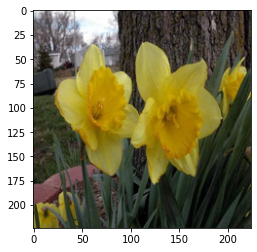

In [ ]:
plt.imshow(images[0])
plt.show()

In [ ]:
hist = cv2.calcHist(images[0],[0],None,[256],[0,256])

In [ ]:
print(hist)

[[570.]
 [102.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]


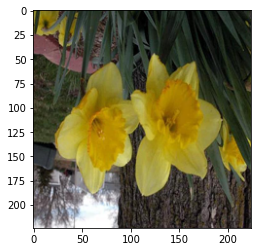

In [ ]:
plt.imshow(cv2.flip(images[0], 0))
plt.show()

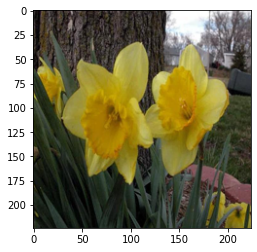

In [ ]:
plt.imshow(cv2.flip(images[0], 2))
plt.show()

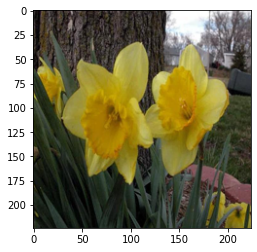

In [ ]:
plt.imshow(cv2.flip(images[0], 1))
plt.show()

##-50%

In [ ]:
rotate=iaa.Affine(translate_percent={"x": -0.5},cval=0)
for index in range (len(X_train)):
  rotated_image=skimage.util.random_noise(X_train[index], mode='gaussian', seed=None, clip=True, var =0.01)
  rotation_30_minus.append([rotated_image,y_train[index]])
  rotation_30_minus.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)

In [ ]:
X_train_30=[]
y_train_30=[]
rotation_15_minus=[]
rotate=iaa.Affine(translate_percent={"x": -0.3},cval=0)
for index in range (len(X_train)):
  rotated_image=skimage.util.random_noise(X_train[index]/255, mode='gaussian', seed=None, clip=True, var =0.1)
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  X_train_30.append(rotated_image*255)
  y_train_30.append(y_train[index])

In [ ]:
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image/255, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)

In [ ]:
plt.imshow(X_train_30[1]/255)
plt.show()

In [ ]:
color_hist_train_des=[]
for image in X_train_30:
  hist1 = cv2.calcHist([image.astype('uint8')],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image.astype('uint8')],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image.astype('uint8')],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)

In [ ]:
X_train_desc_30=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_30[index]), axis=None)
  X_train_desc_30.append(nn)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_30, y_train_30)

SVC(C=1.5, gamma=2)

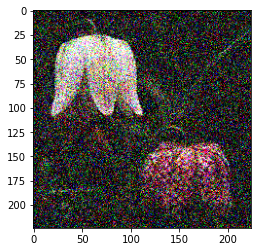

In [ ]:
plt.imshow(rotated_image)
plt.show()

In [ ]:
clf.score(X_train_desc_30,y_train_30)

0.7440257352941176

In [ ]:
clf.score(X_val_desc,y_val)

0.5409836065573771

## -40

In [ ]:
rotate=iaa.SaltAndPepper(0.1)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_20_minus.append([rotated_image,y_train[index]])
  rotation_20_minus.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)

In [ ]:
X_train_30=[]
y_train_30=[]
rotate=iaa.SaltAndPepper(0.1)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  rotation_15_minus.append([rotated_image,y_train[index]])
  X_train_30.append(rotated_image)
  y_train_30.append(y_train[index])
  rotation_15_minus.append([X_train[index][0],y_train[index]])

In [ ]:
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)

In [ ]:
color_hist_train_des=[]
for image in X_train_30:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)

In [ ]:
X_train_desc_30=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_30[index]), axis=None)
  X_train_desc_30.append(nn)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_30, y_train_30)

SVC(C=1.5, gamma=2)

In [ ]:
clf.score(X_train_desc_30,y_train_30)

0.9719669117647058

In [ ]:
clf.score(X_val_desc,y_val)

0.5220588235294118

## -30

In [ ]:
rotate=iaa.SaltAndPepper(0.2)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_15_minus.append([rotated_image,y_train[index]])
  rotation_15_minus.append([X_train[index],y_train[index]])

In [ ]:
X_train_30=[]
y_train_30=[]
rotation_15_minus=[]
rotate=iaa.SaltAndPepper(0.2)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  X_train_30.append(rotated_image)
  y_train_30.append(y_train[index])

In [ ]:
color_hist_train_des=[]
for image in X_train_30:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)

In [ ]:
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)

In [ ]:
X_train_desc_30=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_30[index]), axis=None)
  X_train_desc_30.append(nn)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_30, y_train_30)

SVC(C=1.5, gamma=2)

In [ ]:
clf.score(X_train_desc_30,y_train_30)

0.9030330882352942

In [ ]:
clf.score(X_val_desc,y_val)

0.5475409836065573

## -20 

In [ ]:
rotate=iaa.SaltAndPepper(0.3)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_10_minus.append([rotated_image,y_train[index]])
  rotation_10_minus.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)
rotation_15_minus=[]

In [ ]:
X_train_30=[]
y_train_30=[]
rotate=iaa.SaltAndPepper(0.3)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  X_train_30.append(rotated_image)
  y_train_30.append(y_train[index])

In [ ]:
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)

In [ ]:
color_hist_train_des=[]
for image in X_train_30:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)

In [ ]:
X_train_desc_30=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_30[index]), axis=None)
  X_train_desc_30.append(nn)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_30, y_train_30)

SVC(C=1.5, gamma=2)

In [ ]:
clf.score(X_train_desc_30,y_train_30)

0.8579963235294118

In [ ]:
clf.score(X_val_desc,y_val)

0.5278688524590164

## -10

In [ ]:
rotate=iaa.SaltAndPepper(0.3)
for index in range (len(X_train)):
  rotated_image=skimage.util.random_noise(X_train[index], mode='speckle', seed=None, clip=True, var=0.01)
  rotation_5_minus.append([rotated_image,y_train[index]])
  rotation_5_minus.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)

In [21]:
X_train_30=[]
y_train_30=[]
rotation_15_minus=[]
rotate=iaa.Affine(translate_percent={"x": -0.3},cval=0)
for index in range (len(X_train)):
  rotated_image=skimage.util.random_noise(X_train[index]/255, mode='speckle', seed=None, clip=True, var=0.1)
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  X_train_30.append(rotated_image*255)
  y_train_30.append(y_train[index])

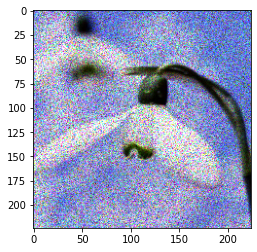

In [22]:
plt.imshow(rotated_image)

In [23]:
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image/255, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)

In [24]:
color_hist_train_des=[]
for image in X_train_30:
  hist1 = cv2.calcHist([image.astype('uint8')],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image.astype('uint8')],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image.astype('uint8')],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)

In [25]:
X_train_desc_30=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_30[index]), axis=None)
  X_train_desc_30.append(nn)

In [26]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_30, y_train_30)

SVC(C=1.5, gamma=2)

In [27]:
clf.score(X_train_desc_30,y_train_30)

0.9025735294117647

In [ ]:
clf.score(X_val_desc,y_val)

0.5475409836065573

In [28]:
clf.score(X_val_desc,y_val)

0.5036764705882353

## 10

In [ ]:
rotate=iaa.AdditivePoissonNoise(20)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_5.append([rotated_image,y_train[index]])
  rotation_5.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)

In [ ]:
X_train_30=[]
y_train_30=[]
rotation_15_minus=[]
rotate=iaa.AdditivePoissonNoise(20)
for index in range (len(X_train)):
  rotated_image=skimage.util.random_noise(X_train[index], mode='speckle', seed=None, clip=True, var=0.1)
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  rotation_15_minus.append([rotated_image,y_train[index]])
  X_train_30.append(rotated_image)
  y_train_30.append(y_train[index])
  rotation_15_minus.append([X_train[index][0],y_train[index]])
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_des_30, y_train_30)

SVC(C=1.5, gamma=2)

In [ ]:
X_train_30=[]
y_train_30=[]
rotate=iaa.SaltAndPepper(0.3)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  X_train_30.append(rotated_image)
  y_train_30.append(y_train[index])
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)
color_hist_train_des=[]
for image in X_train_30:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
X_train_desc_30=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_30[index]), axis=None)
  X_train_desc_30.append(nn)

In [ ]:
clf.score(X_train_des_30,y_train_30)

0.8005514705882353

In [ ]:
clf.score(X_val_des,y_val)

0.5229357798165137

## 20

In [ ]:
rotate=iaa.Cutout(nb_iterations=(1, 4), size=0.2, squared=False)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_10.append([rotated_image,y_train[index]])
  rotation_10.append([X_train[index],y_train[index]])

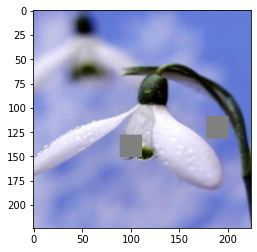

In [ ]:
plt.imshow(rotated_image/255)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)

In [ ]:
X_train_30=[]
y_train_30=[]
rotation_15_minus=[]
rotate=iaa.Cutout(nb_iterations=(2, 4), size=0.2, squared=False)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  rotation_15_minus.append([rotated_image,y_train[index]])
  X_train_30.append(rotated_image)
  y_train_30.append(y_train[index])
  rotation_15_minus.append([X_train[index][0],y_train[index]])
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_des_30, y_train_30)

SVC(C=1.5, gamma=2)

In [ ]:
X_train_30=[]
y_train_30=[]
rotate=iaa.Cutout(nb_iterations=(2, 4), size=0.2, squared=False)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  X_train_30.append(rotated_image)
  y_train_30.append(y_train[index])
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)
color_hist_train_des=[]
for image in X_train_30:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
X_train_desc_30=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_30[index]), axis=None)
  X_train_desc_30.append(nn)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_30, y_train_30)

SVC(C=1.5, gamma=2)

In [ ]:
clf.score(X_train_desc_30,y_train_30)

0.9990808823529411

In [ ]:
clf.score(X_val_desc,y_val)

0.5036764705882353

## 30

In [ ]:
rotate=iaa.Affine(translate_percent={"x": 0.3},cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_15.append([rotated_image,y_train[index]])
  rotation_15.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)

In [ ]:
X_train_30=[]
y_train_30=[]
rotation_15_minus=[]
rotate=iaa.Cutout(nb_iterations=(1, 3), size=0.1, squared=False)
for index in range (len(X_train)):
  rotated_image=cv2.flip(X_train[index], 0)
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  rotation_15_minus.append([rotated_image,y_train[index]])
  X_train_30.append(rotated_image)
  y_train_30.append(y_train[index])
  rotation_15_minus.append([X_train[index][0],y_train[index]])
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_des_30, y_train_30)

SVC(C=1.5, gamma=2)

In [ ]:
X_train_30=[]
y_train_30=[]
rotate=iaa.Cutout(nb_iterations=(2, 4), size=0.2, squared=False)
for index in range (len(X_train)):
  rotated_image=cv2.flip(X_train[index], 0)
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  X_train_30.append(rotated_image)
  y_train_30.append(y_train[index])
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)
color_hist_train_des=[]
for image in X_train_30:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
X_train_desc_30=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_30[index]), axis=None)
  X_train_desc_30.append(nn)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_30, y_train_30)

SVC(C=1.5, gamma=2)

In [ ]:
clf.score(X_train_desc_30,y_train_30)

0.9779411764705882

In [ ]:
clf.score(X_val_desc,y_val)

0.5442622950819672

## 40

In [ ]:
rotate=iaa.Affine(translate_percent={"x": 0.4},cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_20.append([rotated_image,y_train[index]])
  rotation_20.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)

In [ ]:
X_train_30=[]
y_train_30=[]
rotate=iaa.Cutout(nb_iterations=(1, 3), size=0.1, squared=False)
for index in range (len(X_train)):
  rotated_image=cv2.flip(X_train[index], 1)
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  rotation_15_minus.append([rotated_image,y_train[index]])
  X_train_30.append(rotated_image)
  y_train_30.append(y_train[index])
  rotation_15_minus.append([X_train[index][0],y_train[index]])
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_des_30, y_train_30)

SVC(C=1.5, gamma=2)

In [ ]:
X_train_30=[]
y_train_30=[]
rotate=iaa.Cutout(nb_iterations=(2, 4), size=0.2, squared=False)
for index in range (len(X_train)):
  rotated_image=cv2.flip(X_train[index], 1)
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  X_train_30.append(rotated_image)
  y_train_30.append(y_train[index])
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)
color_hist_train_des=[]
for image in X_train_30:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
X_train_desc_30=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_30[index]), axis=None)
  X_train_desc_30.append(nn)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_30, y_train_30)

SVC(C=1.5, gamma=2)

In [ ]:
clf.score(X_train_desc_30,y_train_30)

0.9761029411764706

In [ ]:
clf.score(X_val_desc,y_val)

0.5704918032786885

In [ ]:
import imgaug.augmenters as iaa
rotate = iaa.Affine(scale=0.5,cval = 0)
rotated_image=rotate.augment_image(X_train[15])

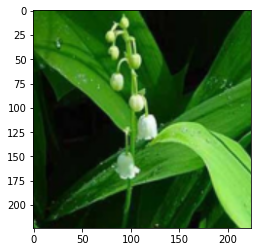

In [ ]:
plt.imshow(rotated_image/255)
plt.show()

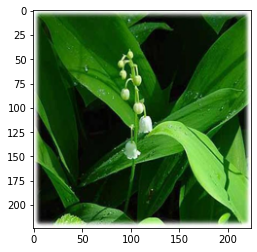

In [ ]:
plt.imshow(X_train[15]/255)
plt.show()

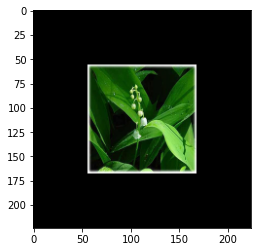

In [ ]:
plt.imshow(rotated_image/255)
plt.show()

## 50

In [ ]:
rotate=iaa.Affine(translate_percent={"x": 0.5},cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_30.append([rotated_image,y_train[index]])
  rotation_30.append([X_train[index],y_train[index]])

In [ ]:
X_train_30=[]
y_train_30=[]
rotate=iaa.Cutout(nb_iterations=(1, 3), size=0.1, squared=False)
for index in range (len(X_train)):
  rotated_image=cv2.flip(X_train[index], 1)
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  rotation_15_minus.append([rotated_image,y_train[index]])
  X_train_30.append(X_train[index])
  y_train_30.append(y_train[index])
  rotation_15_minus.append([X_train[index][0],y_train[index]])
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_des_30, y_train_30)

SVC(C=1.5, gamma=2)

In [ ]:
clf.score(X_train_des_30,y_train_30)

0.9963235294117647

In [ ]:
clf.score(X_val_des,y_val)

0.5779816513761468

## Random từ -50 đến 50

In [ ]:
rotate=iaa.Affine(translate_percent={"x": (-0.5,0.5)},cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  random_rotation.append([rotated_image,y_train[index]])
  random_rotation.append([X_train[index],y_train[index]])

# Tách label và feature đối với các tập data augmentation

In [ ]:
X_train_30 = []
y_train_30 = []
X_train_20 = []
y_train_20 = []
X_train_15 = []
y_train_15 = []
X_train_10 = []
y_train_10 = []
X_train_5 = []
y_train_5 = []

In [ ]:
X_train_30_minus = []
y_train_30_minus = []
X_train_20_minus = []
y_train_20_minus = []
X_train_15_minus = []
y_train_15_minus = []
X_train_10_minus = []
y_train_10_minus = []
X_train_5_minus = []
y_train_5_minus = []

In [ ]:
X_train_random = []
y_train_random = []
random.shuffle(random_rotation)

In [ ]:
random.shuffle(rotation_30)
random.shuffle(rotation_20)
random.shuffle(rotation_15)
random.shuffle(rotation_10)
random.shuffle(rotation_5)

In [ ]:
random.shuffle(rotation_30_minus)
random.shuffle(rotation_20_minus)
random.shuffle(rotation_15_minus)
random.shuffle(rotation_10_minus)
random.shuffle(rotation_5_minus)

In [ ]:
for feature,label in rotation_30:
  X_train_30.append(feature)
  y_train_30.append(label)
for feature,label in rotation_20:
  X_train_20.append(feature)
  y_train_20.append(label)
for feature,label in rotation_15:
  X_train_15.append(feature)
  y_train_15.append(label)
for feature,label in rotation_10:
  X_train_10.append(feature)
  y_train_10.append(label)
for feature,label in rotation_5:
  X_train_5.append(feature)
  y_train_5.append(label)

In [ ]:
for feature,label in rotation_30_minus:
  X_train_30_minus.append(feature)
  y_train_30_minus.append(label)
for feature,label in rotation_20_minus:
  X_train_20_minus.append(feature)
  y_train_20_minus.append(label)
for feature,label in rotation_15_minus:
  X_train_15_minus.append(feature)
  y_train_15_minus.append(label)
for feature,label in rotation_10_minus:
  X_train_10_minus.append(feature)
  y_train_10_minus.append(label)
for feature,label in rotation_5_minus:
  X_train_5_minus.append(feature)
  y_train_5_minus.append(label)

In [ ]:
for feature,label in random_rotation:
  X_train_random.append(feature)
  y_train_random.append(label)

# Normalize và categories

In [ ]:
X_train_30 =np.array(X_train_30).reshape(-1,28,28,1)
X_train_20=np.array(X_train_20).reshape(-1,28,28,1)
X_train_10=np.array(X_train_10).reshape(-1,28,28,1)
X_train_15 =np.array(X_train_15).reshape(-1,28,28,1)
X_train_5=np.array(X_train_5).reshape(-1,28,28,1)

In [ ]:
X_train_30_minus = np.array(X_train_30_minus).reshape(-1,28,28,1)
X_train_20_minus = np.array(X_train_20_minus).reshape(-1,28,28,1)
X_train_15_minus = np.array(X_train_15_minus).reshape(-1,28,28,1)
X_train_10_minus = np.array(X_train_10_minus).reshape(-1,28,28,1)
X_train_5_minus = np.array(X_train_5_minus).reshape(-1,28,28,1)

In [ ]:
X_train_random= = np.array(X_train_random).reshape(-1,28,28,1)

In [ ]:
y_train_30 =tf.keras.utils .to_categorical(y_train_30)
y_train_20 = tf.keras.utils.to_categorical(y_train_20)
y_train_15 =tf.keras.utils.to_categorical(y_train_15)
y_train_10 =tf.keras.utils .to_categorical(y_train_10)
y_train_5 = tf.keras.utils.to_categorical(y_train_5)

In [ ]:
y_train_30_minus =tf.keras.utils .to_categorical(y_train_30_minus)
y_train_20_minus = tf.keras.utils.to_categorical(y_train_20_minus)
y_train_15_minus =tf.keras.utils.to_categorical(y_train_15_minus)
y_train_10_minus =tf.keras.utils .to_categorical(y_train_10_minus)
y_train_5_minus = tf.keras.utils.to_categorical(y_train_5_minus)

In [ ]:
y_train_random =tf.keras.utils.to_categorical(y_train_random)

In [ ]:
X_train_30 = X_train_30 / 255.0
X_train_20 = X_train_20 / 255.0
X_train_15 = X_train_15 / 255.0
X_train_10 = X_train_10 / 255.0
X_train_5 = X_train_5 / 255.0

In [ ]:
X_train_30_minus = X_train_30_minus / 255.0
X_train_20_minus = X_train_20_minus / 255.0
X_train_15_minus = X_train_15_minus / 255.0
X_train_10_minus = X_train_10_minus / 255.0
X_train_5_minus = X_train_5_minus / 255.0

In [ ]:
X_train_random = X_train_random / 255.0

In [ ]:
X_val = np.array(X_val).reshape(-1,28,28,1)
X_val = X_val / 255.0
y_val =tf.keras.utils.to_categorical(y_val)

In [ ]:
X_train = np.array(X_train).reshape(-1,28,28,1)
X_train = X_train / 255.0
y_train =tf.keras.utils.to_categorical(y_train)

In [ ]:
# X_test = np.array(X_test).reshape(-1,28,28,1)
# X_test = X_test / 255.0
# y_test =tf.keras.utils.to_categorical(y_test)

# Build model and evaluate

## RAW

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
filepath = "vgg.h5"
best_model = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

In [ ]:
model.summary()

In [ ]:
batch_size=64
history = model.fit(X_train,y_train, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## -10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_5_minus,y_train_5_minus, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## -20

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_10_minus,y_train_10_minus, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## -30

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_15_minus,y_train_15_minus, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## -40

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_20_minus,y_train_20_minus, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## -50

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_30_minus,y_train_30_minus, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## 10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_5,y_train_5, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## 20

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_10,y_train_10, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## 30

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_15,y_train_15, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## 40

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_20,y_train_20, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## 50

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_30,y_train_30, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## Random

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_random,y_train_random, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))